In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data\\train.csv')

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train_df, test_df = train_test_split(train, train_size=0.7,random_state=0)

In [37]:
train_df.shape, test_df.shape

((29399, 785), (12601, 785))

In [6]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22987,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25862,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
642,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41632,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,29399.000000,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,29399.0,...,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.000000,29399.0,29399.0,29399.0,29399.0
mean,4.468383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.234464,0.132896,0.060376,0.022314,0.024627,0.004082,0.0,0.0,0.0,0.0
std,2.890090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.719155,4.886360,3.278954,1.930835,2.264368,0.495147,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,252.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
## Check unique label;
set(train['label'])
## we have digit from 0 -9 
## rest 784 column reperesent the image of digit 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

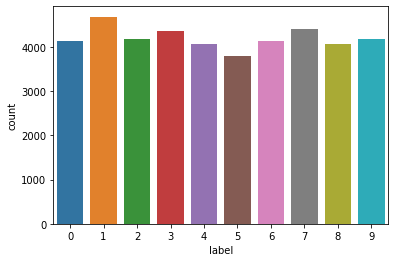

In [7]:
## check the count of each digit 
sns.countplot(train['label'])
plt.show()
## All number have almost same number of data 

In [59]:
## Divide label and image
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label

In [5]:
## Def a function to display image
def display_image(i):
    img=x_train.iloc[i].to_numpy()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(y_label.iloc[i])
    plt.show()


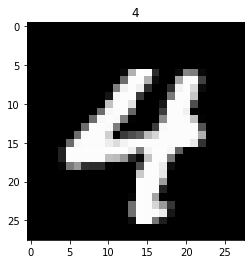

In [10]:
display_image(200) ## look like number is 4


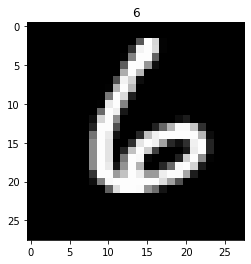

In [13]:
display_image(2000) ## its look like 6

In [60]:
## lets normalized the data, so number will be in range of 0 ,1 
x_train = x_train/255
x_test =  x_test/255 

In [61]:
## lets try pridicting by knn as simple classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [62]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [63]:
y_test_predicted = KNN.predict(x_test)

In [64]:
## Lets test the result
from sklearn import metrics

In [65]:
## Check acuracy, and confusion matrix
print(metrics.accuracy_score(y_test_label,y_test_predicted))

0.9640504721847473


In [ ]:
## Now we can see KNN give 96% accuracy

In [17]:
## Now lets try to change the color of image from gray to black and white , to do this , just make 1 where we have pixle value and keep 0 as it its 
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label
x_train[x_train>0]=1
x_test[x_test>0]=1


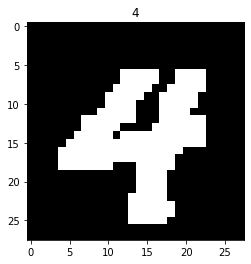

In [18]:
display_image(200)

In [19]:
KNN2 = KNeighborsClassifier(n_neighbors=3)
KNN2.fit(x_train, y_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
y2_test_predicted = KNN2.predict(x_test)

In [21]:
## Check acuracy, and confusion matrix
print(metrics.accuracy_score(y_test_label,y2_test_predicted))
## here also we have near 96 %

0.9616697087532735


In [22]:
## Now also try to SVM 
from sklearn import svm
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label
x_train = x_train/255
x_test =  x_test/255 

In [ ]:
display_image(200) ## look like number is 4


In [23]:
model_svm = svm.SVC()
model_svm.fit(x_train, y_label.values.ravel())
model_svm.score(x_test,y_test_label)
## here we got accuracy of 97%

0.9695262280771367

In [24]:
## Now lets try by changing to black n white
x_train = train_df.iloc[:,1:]
y_label = train_df.label
x_test = test_df.iloc[:,1:]
y_test_label = test_df.label
x_train[x_train>0]=1
x_test[x_test>0]=1


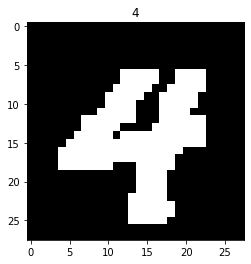

In [25]:
display_image(200) ## look like number is 4


In [26]:
model_svm2 = svm.SVC()
model_svm2.fit(x_train, y_label.values.ravel())
model_svm2.score(x_test,y_test_label)
## Here also we got same accuracy, 

0.9695262280771367

The reason gray and black and white approach give same result becuase we have normalized the data so effect is almost same for both


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [42]:
len(x_train), len(y_label)


(29399, 29399)

In [45]:
x_train_new = x_train.iloc[:5000]
y_label_new = y_label.iloc[:5000]

In [46]:
len(x_train_new), len(y_label_new)

(5000, 5000)

In [48]:
## Now lets work on optimizing the k value of KNN by cross validation and GridSearchCV

knn3 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 20)}

knn3_gscv = GridSearchCV(knn3, param_grid, cv=5)

## Now fit the model
knn3_gscv.fit(x_train_new, y_label_new)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
knn3_gscv.best_params_ 

{'n_neighbors': 6}

In [51]:
#best k value is 
help(GridSearchCV)


_search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either estimator needs to provide a ``score`` function,
 |      or ``sco

In [8]:
## lets prepare for submission 
train = pd.read_csv('data\\train.csv')
test = pd.read_csv('data\\test.csv')


In [9]:
from sklearn import svm
x_train = train.iloc[:,1:]
y_label = train.label
x_test = test
x_train = x_train/255
x_test =  x_test/255 

In [10]:
model_svm2 = svm.SVC()
model_svm2.fit(x_train, y_label.values.ravel())


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
predict = model_svm2.predict(x_test)

In [12]:
predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [13]:
df = pd.DataFrame(predict)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('output.csv', header=True)

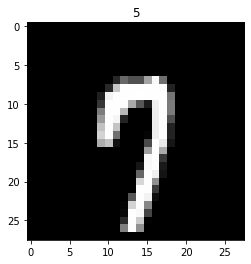

In [23]:
## Def a function to display image
i=1001
img=x_test.iloc[i].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(y_label.iloc[i])
plt.show()